<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">


# **Customer Churn Prediction Using Artificial Neural Network**

Customer churn prediction is the process of estimating the likelihood that a customer will stop using a company's products or services. This is especially important for businesses with repeat customers or subscription-based models.

To keep a healthy customer base, companies need to track which customers are likely to leave and understand the reasons behind it. This requires analyzing customer behavior, usage patterns, and other attributes that may indicate the risk of churn.

In this project, we build a Artificial Neural Network model to predict the churn, helping business take proactive steps to retain customers.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.shape

(7043, 21)

In [38]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* The dataset has no duplicate rows.

In [39]:
duplicates = df.duplicated().sum()
print(f"No of duplicate rows: {duplicates}")

No of duplicate rows: 0


<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* Dropping the CustomerID column, which has no effect on predicting churn

In [40]:
df.drop('customerID', axis = 'columns', inplace= True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* The **TotalCharges** column is stored as an object but should be converted to a float for accurate analysis.

In [42]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* The values are in string format. Convert into float

In [43]:
#pd.to_numeric(df.TotalCharges)

<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* Some of the values are empty string which can't be converted into numeric

In [44]:
df[df['TotalCharges'].str.strip() == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [45]:
(df['TotalCharges'].str.strip() == '').sum()

11

<div style="border:2px solid purple; padding:10px; background-color:#ffe6f0; border-radius:8px; color:black;">

* There are 11 rows where the column **TotalCharges** has empty strings. Now remove those rows from the data

In [46]:
df = df[df['TotalCharges'].str.strip() != '']

In [47]:
df.shape

(7032, 20)

In [48]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [49]:
df.TotalCharges.dtypes

dtype('float64')

<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">


# **Exploratory Data Analysis**

To begin our exploratory data analysis, we first need to understand the composition of our customer base.

In [50]:
print(df['Churn'].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">


* We divide the columns of the DataFrame into two separate lists — categorical columns and numerical columns — based on the number of unique values in each column.

In [51]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
cat_col = []
num_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        cat_col.append(column)
    else:
        num_col.append(column)  

<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">

##### **Visualizing Categorical Feature Distributions**

To explore the dataset, we plotted the distribution of all categorical features (≤20 unique values). This helps us quickly see the frequency of categories.

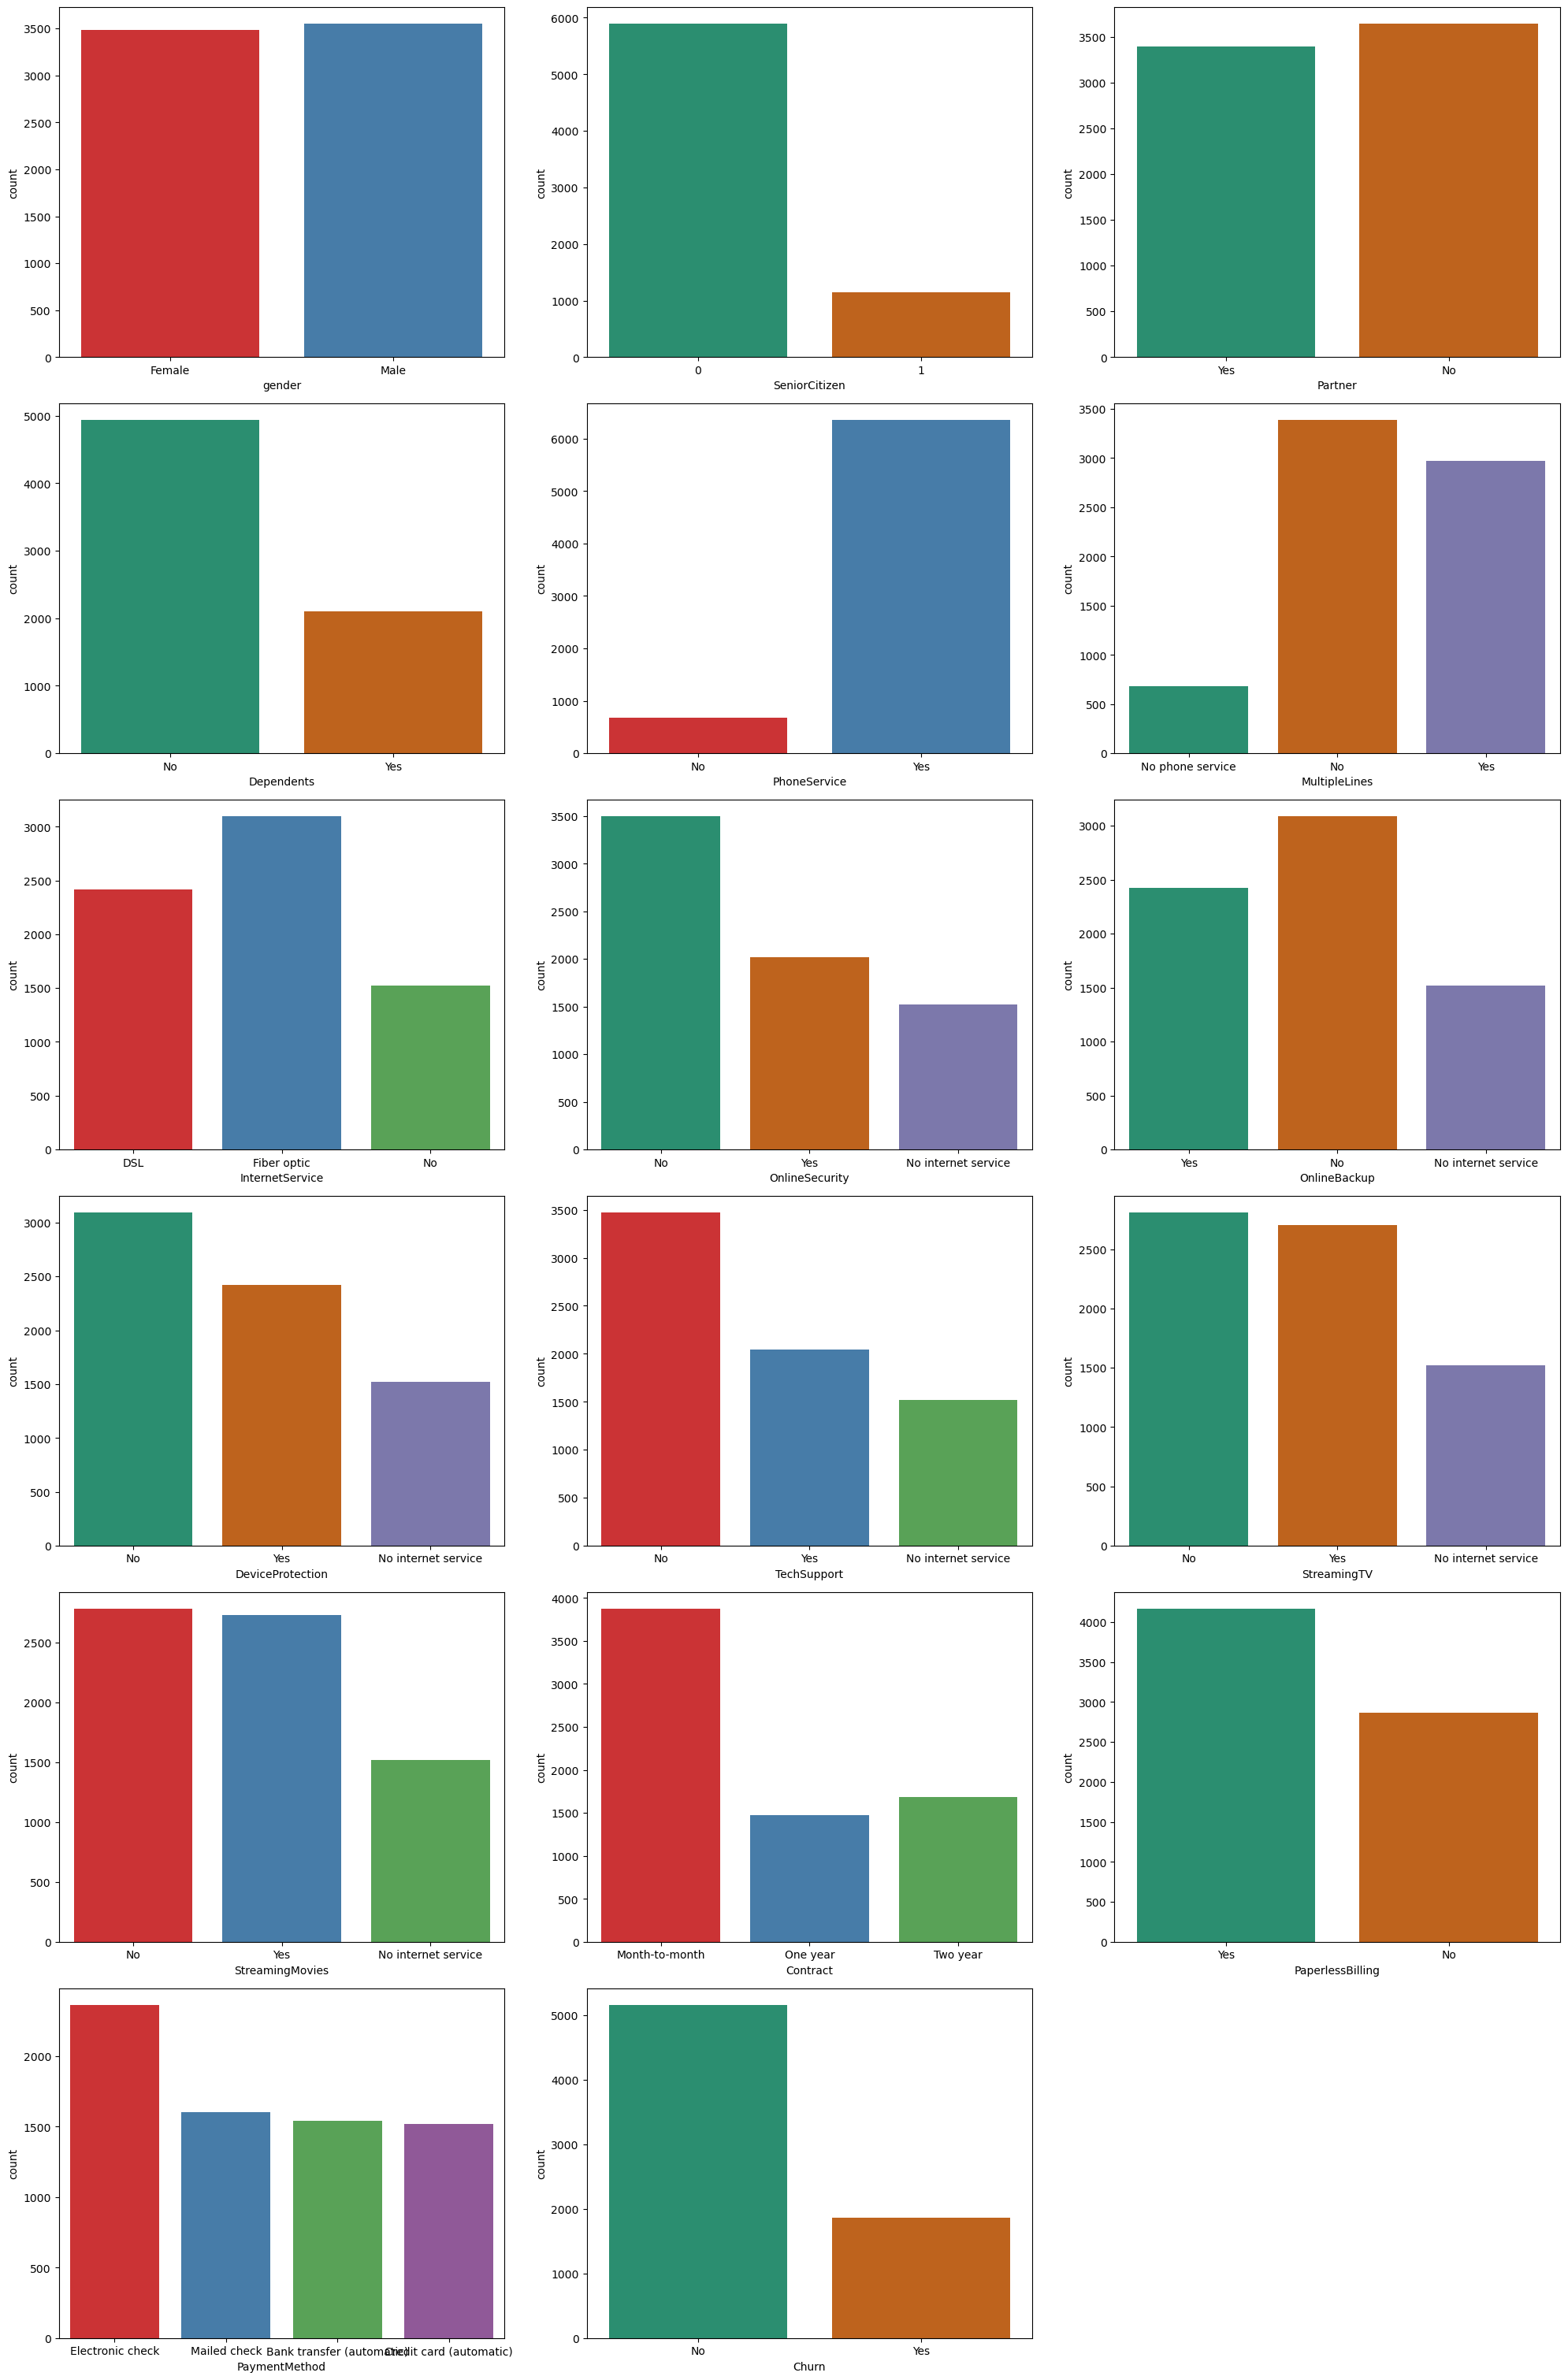

In [52]:
plt.figure(figsize=(20, 50))
plot_num = 1

palettes = ["Set1", "Dark2"]

for col in cat_col:
    plt.subplot(10, 3, plot_num)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette = random.choice(palettes))  
    plot_num += 1

plt.tight_layout()
plt.show()

<div style="border:2px solid green; padding:10px; background-color:#e6ffe6; border-radius:8px; color:black;">

**Key Observations:**

* **Churn:** Strong imbalance with far more "No" than "Yes".
* **Contract:** Most customers are on **Month-to-month**, fewer on one/two-year contracts.
* **Demographics:** **gender** is \~50/50. Most are not **SeniorCitizen**, many lack **Dependents**, and **Partner** is evenly split.
* **Core Services:** Nearly all have **PhoneService**; **InternetService** is mostly **Fiber optic** or **DSL**.
* **Add-on Services:** **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport** are mostly "No".
* **Billing & Payment:** Most use **PaperlessBilling**; **Electronic check** is the most common **PaymentMethod**.

This highlights key customer traits and the major **churn imbalance**, which must be handled in modeling.



<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">

##### **Distribution of Numerical Features**

Histograms were plotted for tenure, MonthlyCharges, and TotalCharges to understand their spread and patterns.

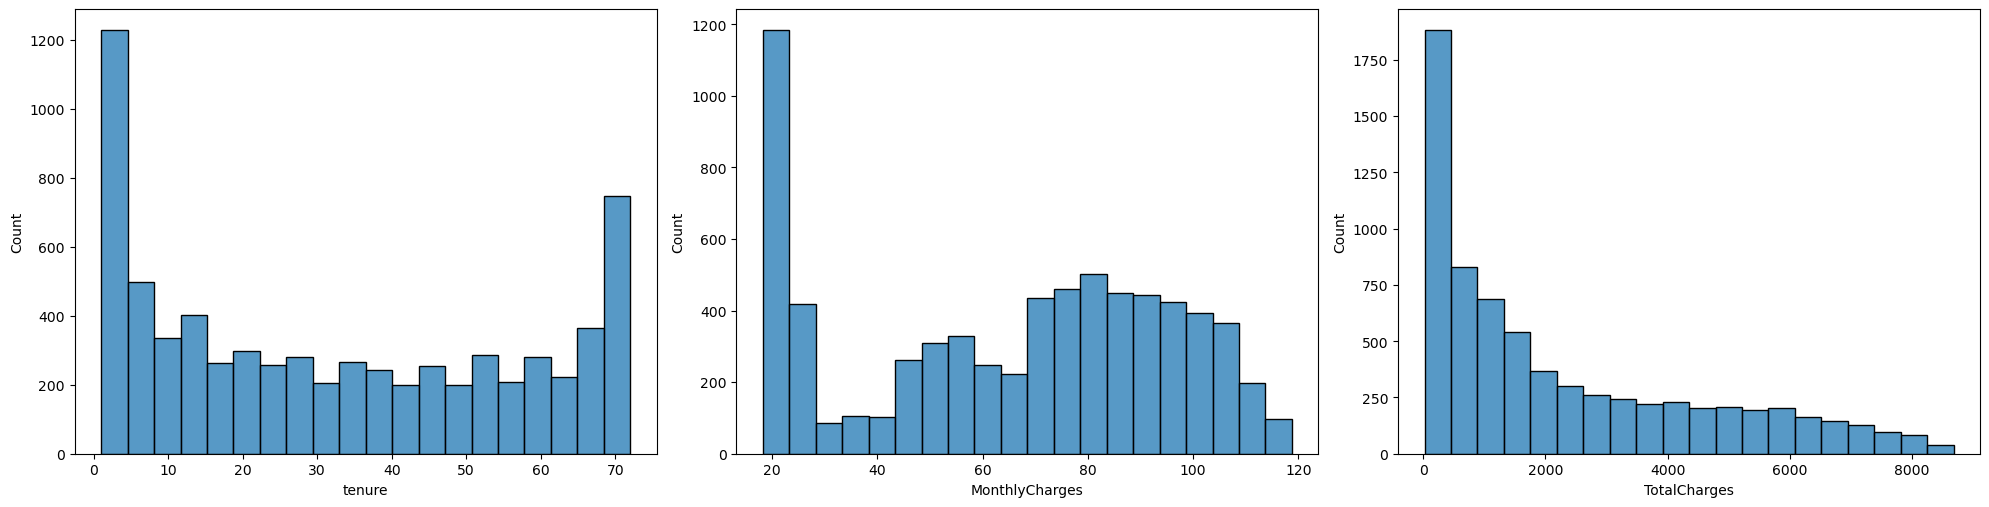

In [53]:
plt.figure(figsize=(20, 50))
plot_num = 1

for col in num_col:
    plt.subplot(10, 3, plot_num)
    sns.histplot(data=df, x=col, bins = 20)
    plot_num += 1

plt.tight_layout()
plt.show()

<div style="border:2px solid green; padding:10px; background-color:#e6ffe6; border-radius:8px; color:black;">

**Key Observations:**

* **tenure:** Bimodal — many **new customers** (1–2 months) and many **long-term customers** (\~70 months).
* **MonthlyCharges:** Left-skewed — peak around **\$20** for basic plans, with a spread across higher-priced services.
* **TotalCharges:** Right-skewed — most customers have low totals (short tenure), while a few long-term customers have very high totals.

These patterns highlight distinct customer segments and confirm that the numerical features are not normally distributed.




<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">

##### **Churn Distribution Across Categorical Features**

By plotting categorical features with Churn as the hue, we can directly compare customers who stayed versus those who left.

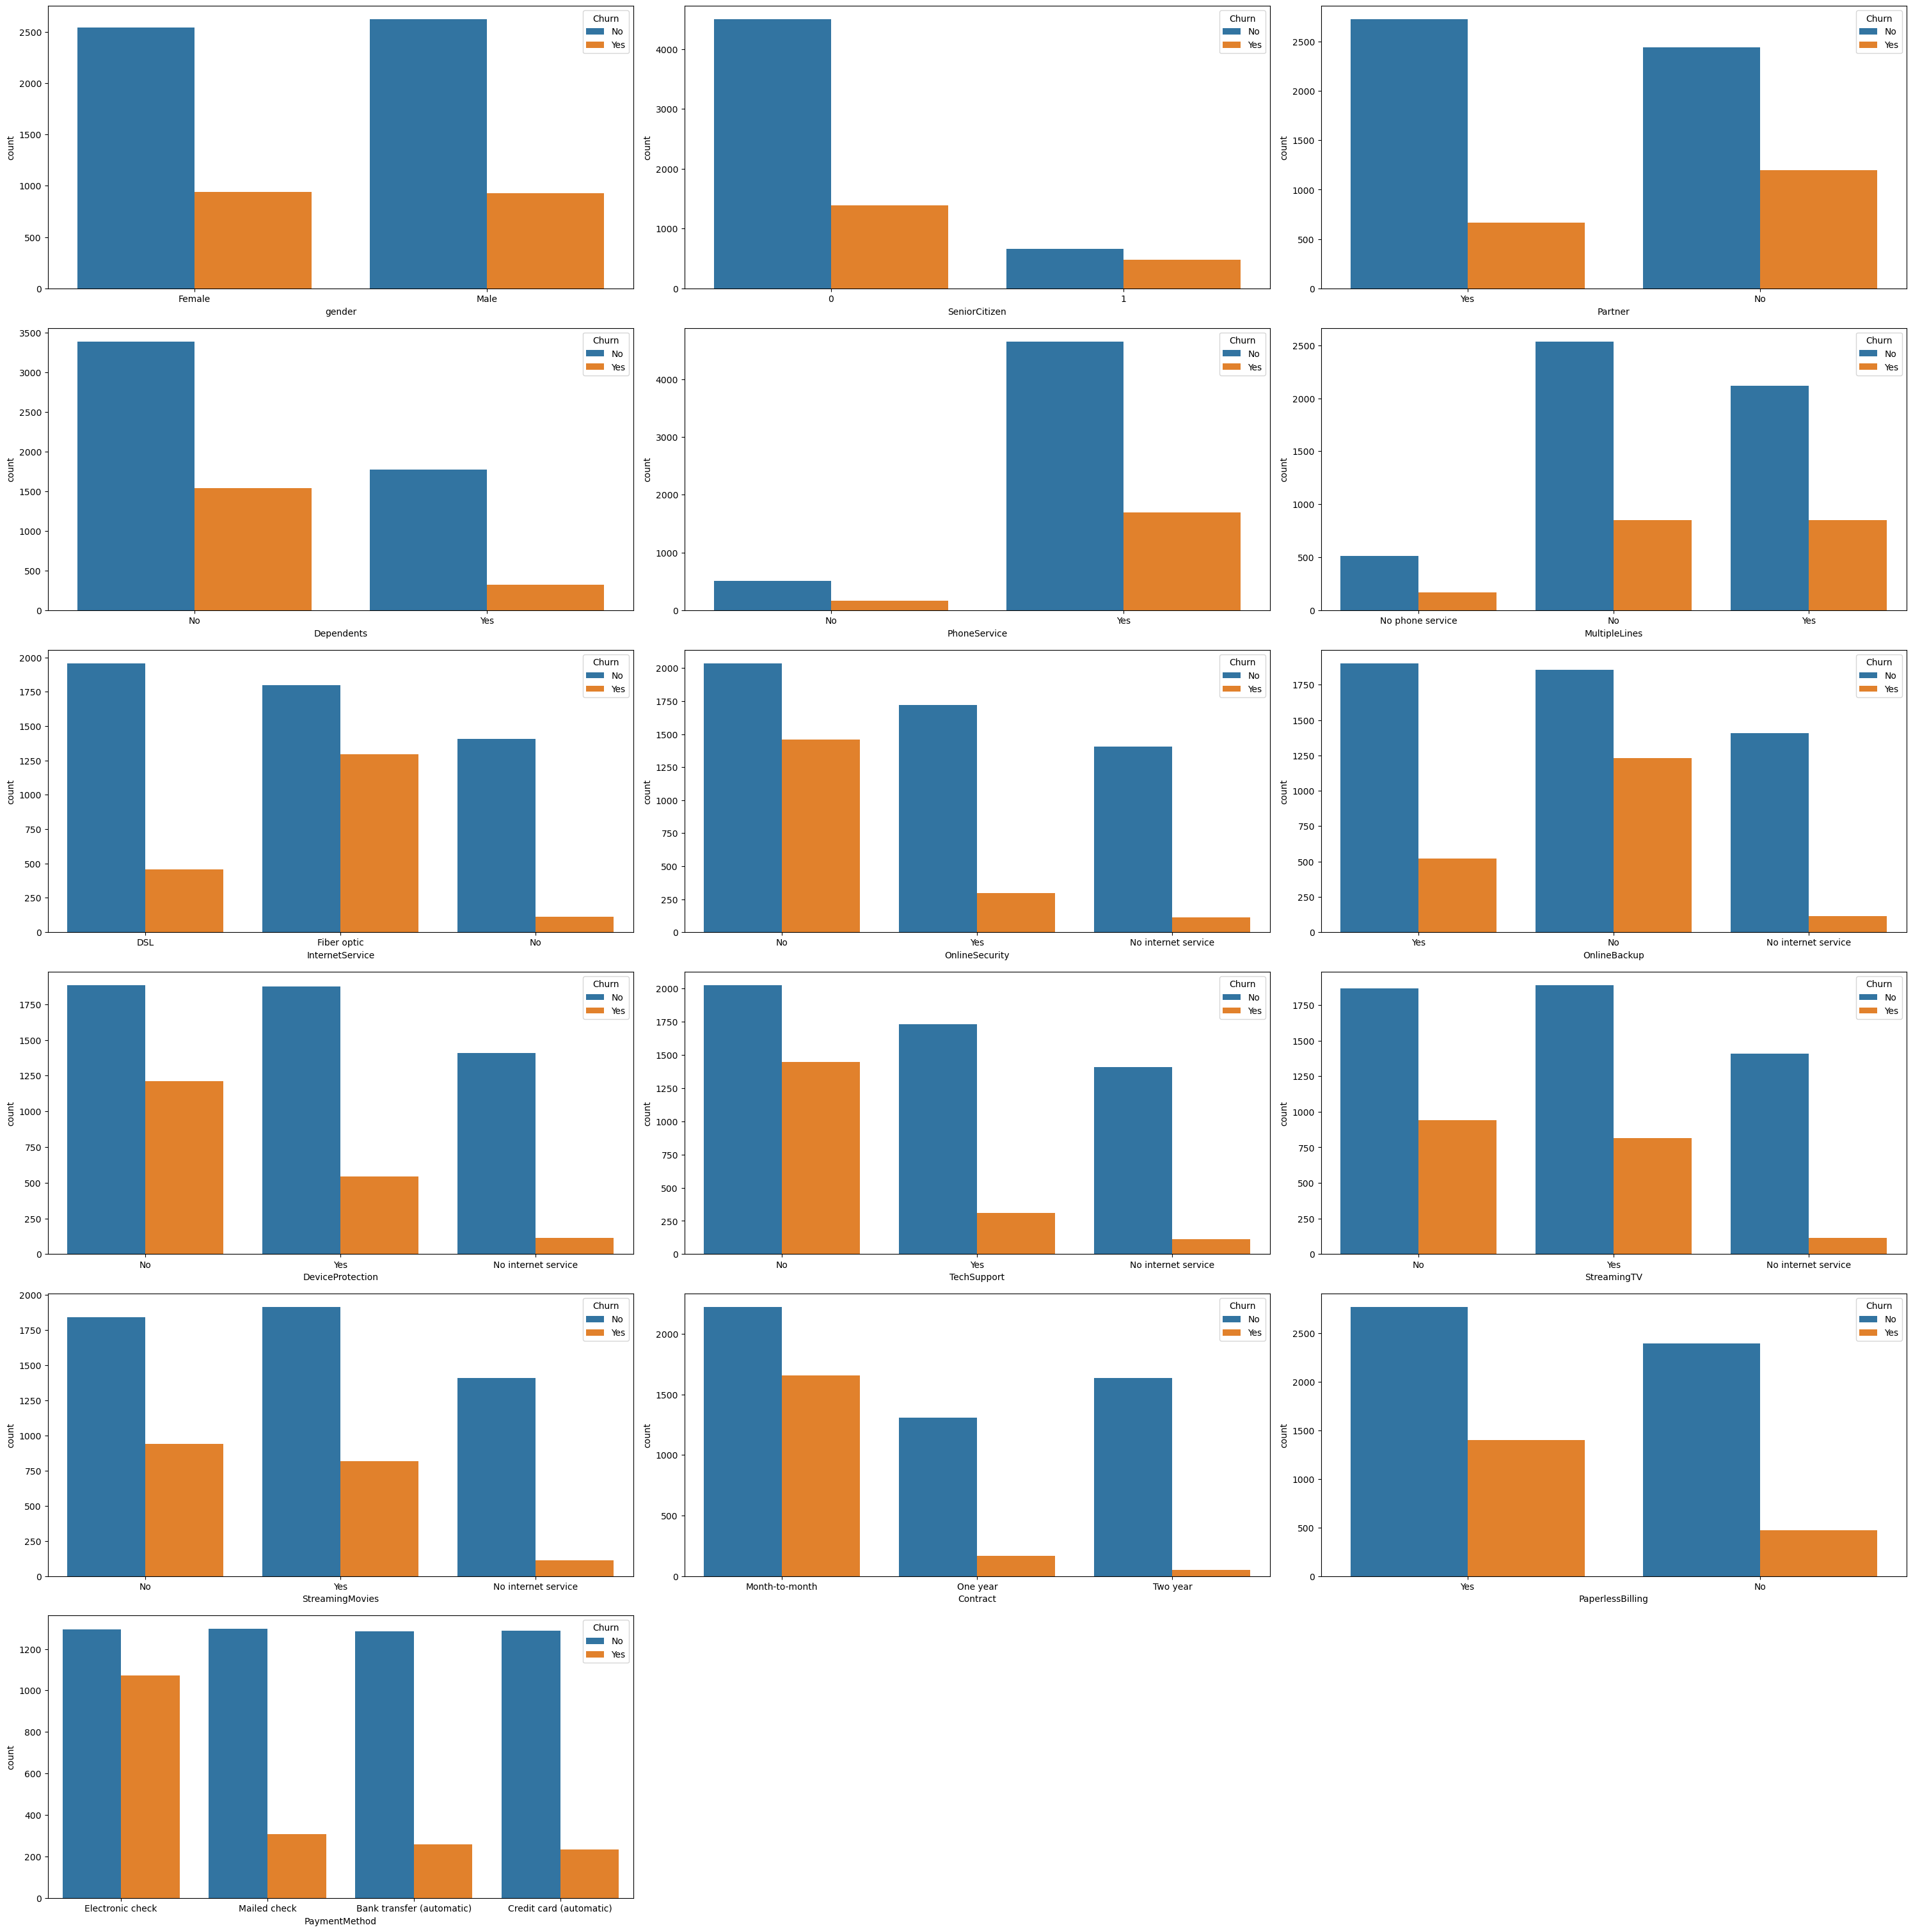

In [54]:
plt.figure(figsize=(30,50))
plot_num = 1
for col in cat_col:
    if  col != "Churn":
        plt.subplot(10,3,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

<div style="border:2px solid green; padding:10px; background-color:#e6ffe6; border-radius:8px; color:black;">

**Key Observations:**

* **Contract:** Customers on **Month-to-month** contracts churn much more than those on **One year** or **Two year** contracts.
* **InternetService & Add-ons:** **Fiber optic** users churn more than DSL. Customers without **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, or **TechSupport** show consistently higher churn.
* **PaymentMethod:** **Electronic check** users have the highest churn rate.
* **Demographics:** **SeniorCitizens**, and customers without a **Partner** or **Dependents**, are more likely to churn.
* **Less Impactful:** **Gender** and **PhoneService** show little difference in churn.

This step highlights which features are most influential in churn and will be key for modeling.


<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">

#####  **Correlation Heatmap of Numerical Features**

A correlation heatmap was created to examine relationships between numerical variables and detect potential multicollinearity. Correlation values range from -1 (strong negative) to +1 (strong positive).

C:\Users\sowmy\AppData\Local\Temp\ipykernel_12516\3585213332.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_cols.corr()


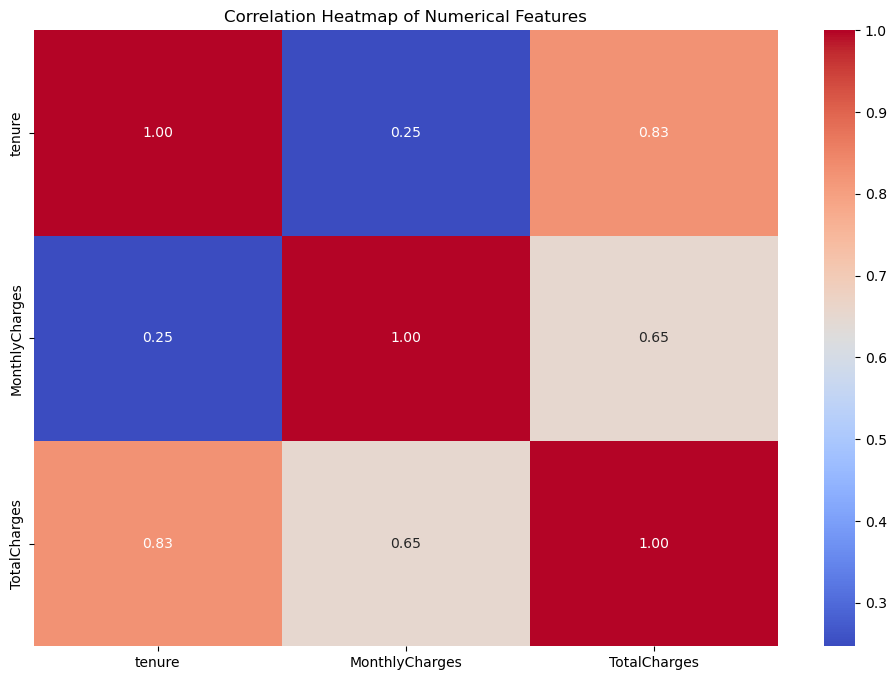

In [55]:
plt.figure(figsize=(12, 8))

numerical_cols = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<div style="border:2px solid green; padding:10px; background-color:#e6ffe6; border-radius:8px; color:black;">

**Key Observations:**

* **tenure & TotalCharges (0.83):** Very strong positive correlation — longer tenure leads to higher accumulated charges. Indicates high multicollinearity.
* **MonthlyCharges & TotalCharges (0.65):** Moderate positive correlation — higher monthly bills generally result in higher total charges.
* **tenure & MonthlyCharges (0.25):** Weak positive correlation — long-term customers don’t necessarily pay higher monthly charges, possibly due to newer customers choosing premium plans.

This analysis confirms expected relationships and highlights potential multicollinearity to consider before modeling.


<div style="border:2px solid #3399ff; padding:10px; background-color:#e6f3ff; border-radius:8px; color:black;">

##### **Distribution of Numerical Features by Churn**

Box plots help us compare how numerical features differ between customers who churn (**Yes**) and those who stay (**No**).


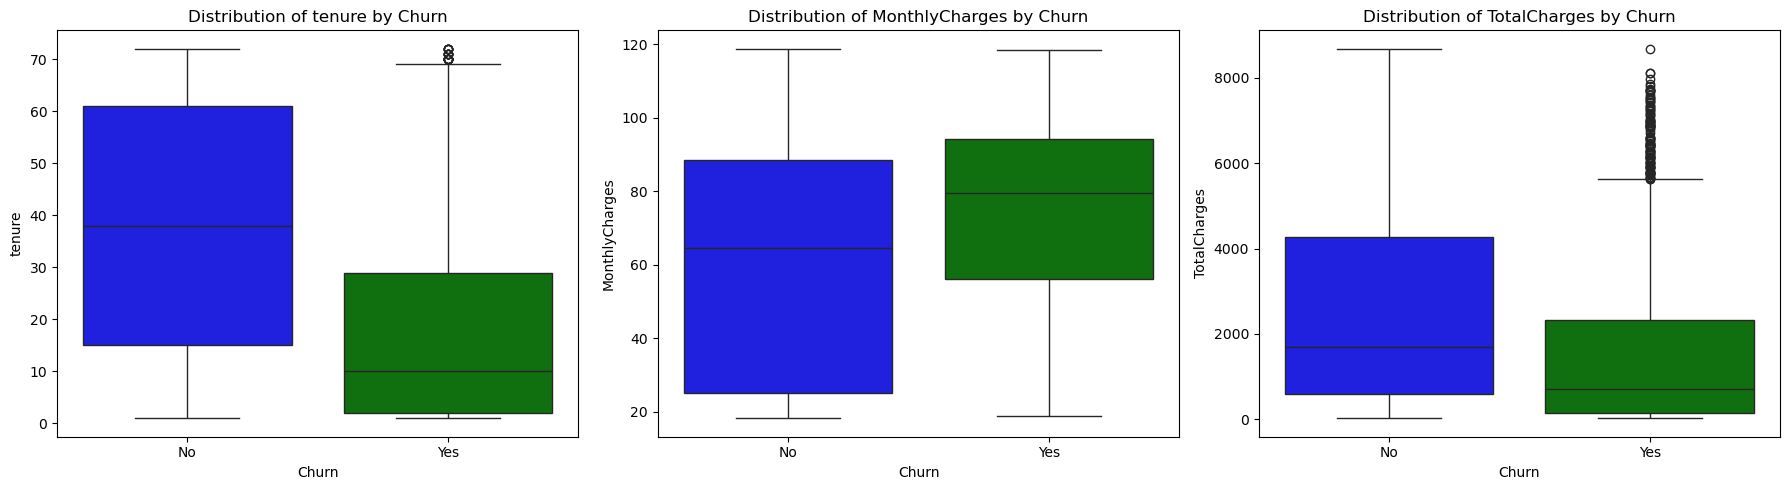

In [ ]:
plt.figure(figsize=(18, 5))

for i, col in enumerate(num_col):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette=['blue', 'green'], legend=False)
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel('Churn')

plt.tight_layout()
plt.show()

<div style="border:2px solid green; padding:10px; background-color:#e6ffe6; border-radius:8px; color:black;">



**Key Observations:**

* **tenure:** Churners have a much lower median (\~10 months), with most values at the low end. Non-churners show higher and more spread-out tenure, reflecting loyalty.
* **MonthlyCharges:** Churners typically pay higher monthly charges, suggesting price-sensitive customers or higher service expectations.
* **TotalCharges:** Churners show lower totals due to shorter tenure, while non-churners accumulate higher charges over time.

These patterns confirm that **tenure**, **MonthlyCharges**, and **TotalCharges** are strong predictors of churn.



<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

* All the unique values for each column in dataframe

In [58]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

* All the unique values for categorical columns in a DataFrame.

In [59]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [60]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

* In several columns, one of the unique values was "No internet service".

* Since having no internet service in this context means the customer cannot use that feature, it is effectively the same as "No" for that service. Keeping it as a separate category would unnecessarily increase the number of unique values and make the model treat it as a distinct case, even though it means the same as "No" in terms of service availability.

In [61]:
df.replace('No internet service','No',inplace = True)

In [62]:
df.replace('No phone service','No',inplace = True)

In [63]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

* Converted Yes/No values in selected columns to 1/0 values for easier analysis.

In [64]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No' : 0},inplace=True)

In [65]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [66]:
df['gender'].replace({'Female' : 1, 'Male' : 0},inplace=True)

In [67]:
df['gender'].unique()

array([1, 0], dtype=int64)

<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

### **One Hot Encoding**

* Some columns have more than 2 different classes. Use One-Hot Encoding to convert them into different binary columns (one for each category).

In [68]:
df = pd.get_dummies(data = df, columns = ['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [69]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [70]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

#### **Scale the dataset**

* Some of the columns are not in the range 0 to 1. So they needed to be scaled. 


In [71]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [73]:
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

## Training and Test Data

* The dataset is split into features (X) and target (y), followed by a train-test split with 20% of the data reserved for testing and stratification applied to maintain the class distribution.

In [74]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']

In [75]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 5, stratify = y)

<div style="border:2px solid yellow; padding:10px; background-color:#ffffcc; border-radius:8px; color:black;">

##### **Handling Class Imbalance with SMOTE**

SMOTE was applied to handle the class imbalance in the training data. It works by generating synthetic samples for the minority class, ensuring both classes are represented equally. This helps the model learn better decision boundaries and improves its ability to correctly identify the minority class. After applying SMOTE, the dataset became balanced, reducing bias toward the majority class.

In [76]:
#!pip install imbalanced-learn

In [80]:
from imblearn.over_sampling import SMOTE

# Display the class distribution before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=5)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

# Check the new shapes
print(f'\nThe shape of X_train_resampled is {X_train_resampled.shape}')
print(f'The shape of y_train_resampled is {y_train_resampled.shape}')

Before SMOTE:
0    4130
1    1495
Name: Churn, dtype: int64

After SMOTE:
0    4130
1    4130
Name: Churn, dtype: int64

The shape of X_train_resampled is (8260, 26)
The shape of y_train_resampled is (8260,)


<div style="border:2px solid pink; padding:10px; background-color:#ffccff; border-radius:8px; color:black;">

## **Model Building**

A neural network model is defined using a Sequential architecture with two hidden layers (64 and 32 neurons) and a dropout layer to prevent overfitting. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy metric, and then trained on the training set with class weights applied to address imbalance.

Predictions are generated on the test set, and evaluation metrics including accuracy, classification report, and confusion matrix are produced to assess model performance. Training history is visualized through plots of loss and accuracy over epochs for both training and validation sets to monitor learning trends. 

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\sowmy\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(
    X_train_resampled, y_train_resampled, 
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6976 - loss: 0.5616 - val_accuracy: 0.7234 - val_loss: 0.6162
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7550 - loss: 0.4989 - val_accuracy: 0.7718 - val_loss: 0.5713
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7609 - loss: 0.4845 - val_accuracy: 0.7827 - val_loss: 0.5504
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7712 - loss: 0.4765 - val_accuracy: 0.7554 - val_loss: 0.5888
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7691 - loss: 0.4749 - val_accuracy: 0.7676 - val_loss: 0.5533
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7774 - loss: 0.4669 - val_accuracy: 0.7621 - val_loss: 0.5651
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7760 - loss: 0.4687 - val_accuracy: 0.7276 - val_loss: 0.6020
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7719 - loss: 0.4698 - val_ac

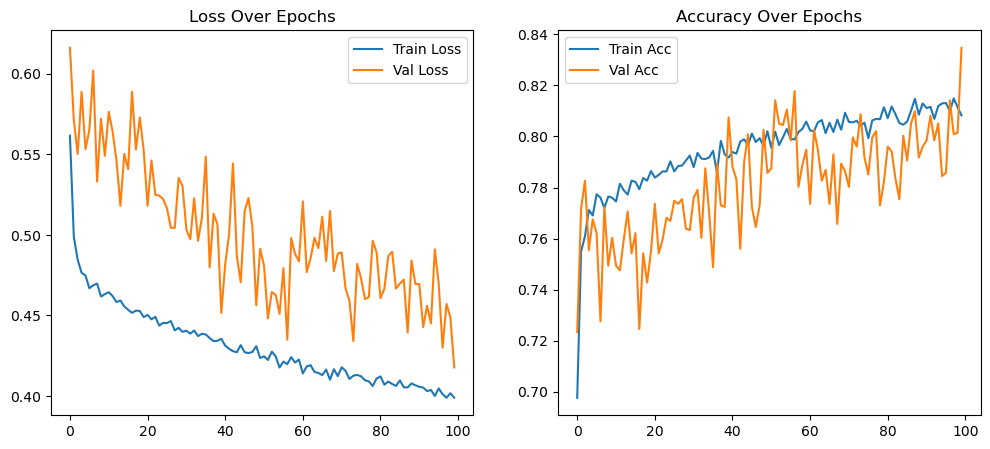

In [84]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy Over Epochs')
plt.show()


In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.7704335465529495

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407

Confusion Matrix:
 [[848 185]
 [138 236]]


<div style="border:2px solid pink; padding:10px; background-color:#ffccff; border-radius:8px; color:black;">


## **HyperParameter Tuning**

A hyperparameter tuning process is conducted using Keras Tuner with a RandomSearch strategy to optimize the neural network architecture and training parameters. The model architecture includes two hidden layers with tunable units and dropout rates, and the learning rate of the Adam optimizer is also tuned.

The search is performed over 20 trials, using validation accuracy as the objective. Early stopping is applied during training of the best model to prevent overfitting. Training history is visualized through plots of accuracy and loss over epochs, and the optimized model is evaluated on the test set with accuracy and a classification report. 

In [86]:
!pip install keras-tuner --quiet

In [87]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(hp):
    model = Sequential()
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model with variable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

<div style="border:2px solid pink; padding:10px; background-color:#ffccff; border-radius:8px; color:black;">


### **Hyperparameter Search**

In [88]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='churn_prediction'
)

tuner.search(
    X_train_resampled, y_train_resampled, 
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

Trial 20 Complete [00h 00m 37s]
val_accuracy: 0.8734866976737976

Best val_accuracy So Far: 0.9297820925712585
Total elapsed time: 00h 13m 49s


<div style="border:2px solid pink; padding:10px; background-color:#ffccff; border-radius:8px; color:black;">

### **Best Model**

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     
    patience=30,             
    restore_best_weights=True 
)


best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:", best_hyperparameters.values)

# Train with EarlyStopping
history = best_model.fit(
    X_train_resampled, y_train_resampled, 
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)


c:\Users\sowmy\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'units_1': 128, 'dropout_1': 0.0, 'units_2': 64, 'dropout_2': 0.4, 'learning_rate': 0.001}
Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8562 - loss: 0.3204 - val_accuracy: 0.8535 - val_loss: 0.3760
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8615 - loss: 0.3123 - val_accuracy: 0.7639 - val_loss: 0.5176
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8559 - loss: 0.3167 - val_accuracy: 0.8795 - val_loss: 0.3233
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8644 - loss: 0.3077 - val_accuracy: 0.8789 - val_loss: 0.3293
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8615 - loss: 0.3085 - val_accuracy: 0.8493 - val_loss: 0.3900
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8646 - loss: 0.3062 - val_accuracy: 0.9116 - val_loss: 0.3038
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8653 - loss: 0.3047 - val_accuracy: 0.8747 -

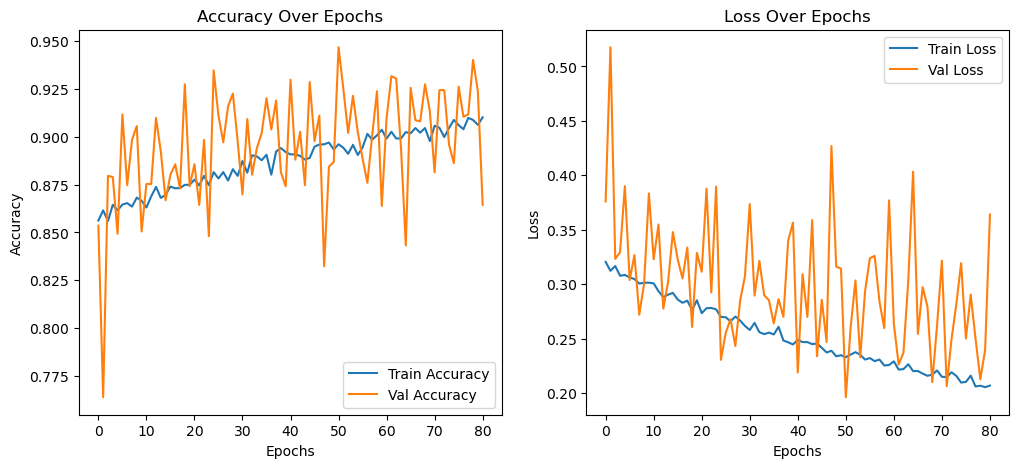

In [90]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()


In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [95]:
# Predicted probabilities for the positive class (Churn = 1)
y_pred_prob = best_model.predict(X_test).flatten()

# Convert probabilities into binary predictions using threshold = 0.5
y_pred = (y_pred_prob > 0.5).astype(int)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Test Accuracy: 0.7356076759061834

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.50      0.68      0.58       374

    accuracy                           0.74      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.74      0.75      1407


Confusion Matrix:



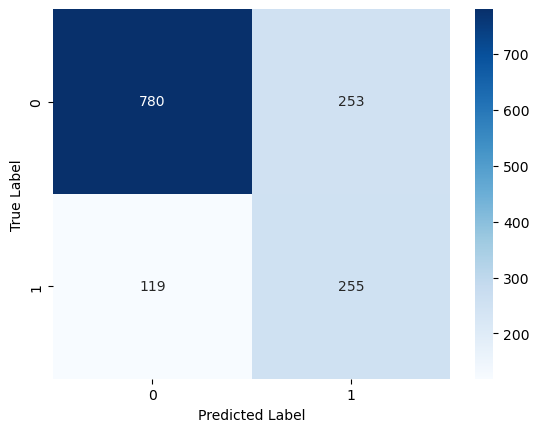

In [96]:
# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report (Precision, Recall, F1-score, Support)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# Heatmap of Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [97]:
# Compute ROC Curve values
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)

# Area under ROC curve
roc_auc = auc(fpr, tpr)


In [98]:
# Compute Precision-Recall values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

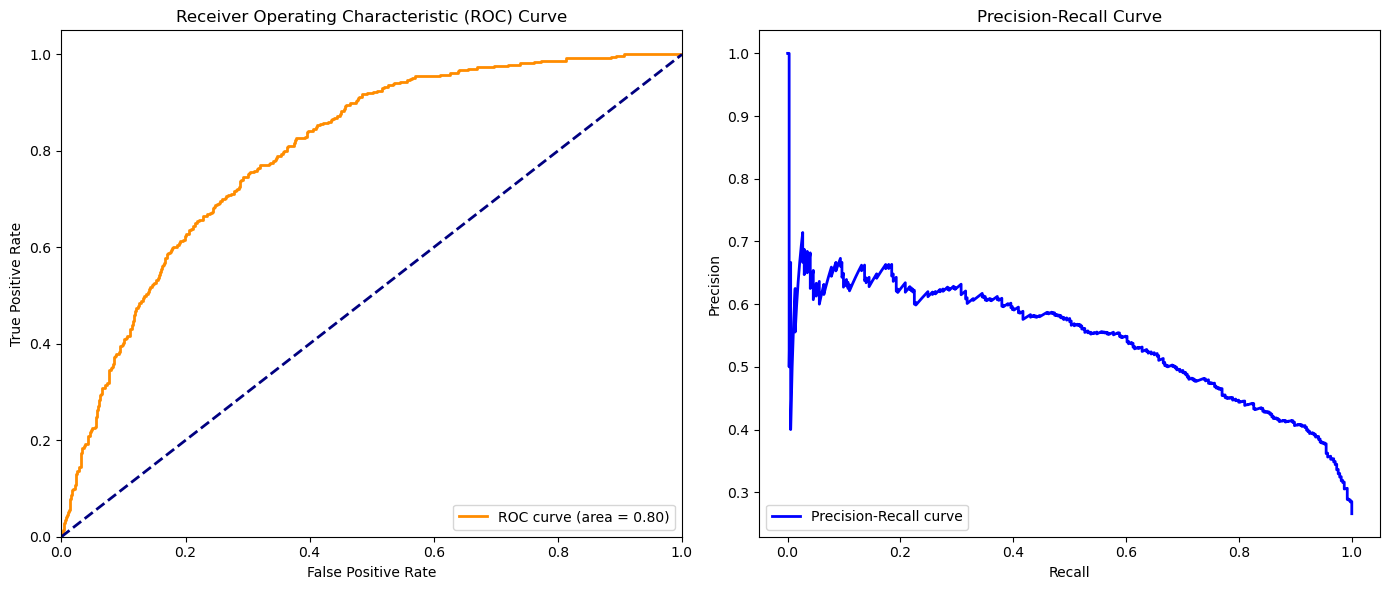

In [99]:
plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


<div style="border:2px solid pink; padding:10px; background-color:#fff5e6; border-radius:8px; color:black;">

## Project Summary & Conclusion

This project focused on developing an Artificial Neural Network (ANN) to predict customer churn using customer behavior and demographic attributes. The process began with thorough data cleaning, exploratory analysis, and feature engineering to prepare the dataset. To tackle the imbalance between churners and non-churners, **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to the training data. Model architecture and hyperparameters were fine-tuned using Keras Tuner to achieve the best performance.

### Final Model Performance

The optimized model was tested on an unseen dataset that retained the original imbalance. The results were as follows:

* **Test Accuracy:** 73.56%
* **AUC (Area Under ROC Curve):** 0.80

### Analysis of Results

Accuracy gives an overall sense of performance, but because the dataset is imbalanced, metrics like precision, recall, and the confusion matrix provide a clearer picture:

* **Class 0 (No Churn):**

  * Precision: 0.87
  * Recall: 0.76
  * The model is very reliable at identifying customers who will not churn.

* **Class 1 (Churn):**

  * Recall: 0.68 → The model successfully identifies 68% of actual churners. This is an important business insight, as it means most at-risk customers can be flagged for retention campaigns.
  * Precision: 0.50 → Half of the customers flagged as likely to churn may not actually leave, which means some retention resources could be spent unnecessarily.

* **ROC & PR Curves:**

  * The **AUC score of 0.80** shows the model has strong discriminatory power, well above random guessing (0.5).
  * The **Precision-Recall curve** highlights the trade-off between catching more churners (recall) and reducing false alarms (precision), which is typical in imbalanced problems.

### Conclusion

The final neural network model proves to be a useful tool for churn prediction. With a recall of 68% for churners, it enables the business to identify and proactively engage a large share of customers who are at risk of leaving.

An interesting observation was the gap between validation accuracy on the balanced training data (\~93%) and the test accuracy on the imbalanced real-world data (\~74%). This highlights the importance of evaluating models on data that reflects real-world conditions. The test results provide a realistic benchmark of what can be expected in production.

**Next Steps:** One potential improvement is adjusting the classification threshold (currently 0.5). Lowering or raising the threshold can help optimize for higher precision (fewer false alarms) or higher recall (catching more churners), depending on business priorities and the cost trade-offs of retention strategies.

